In [16]:
import pandas as pd
import numpy as np
import glob 
import matplotlib.pyplot as plt

### Verificação de dados inválidos

In [3]:
def dataReader(path_names):
    data_n = pd.DataFrame()
    for i in path_names:
        low_data = pd.read_csv(i,header=None)
        data_n = pd.concat([data_n,low_data],ignore_index=True)
    return data_n

In [4]:
def checkNullValues(path_names):
    for file in path_names:
        data = pd.read_csv(file, header=None)
        nullValues = data.isnull().sum()
        if any(nullValues > 0):
            print('CSV file {} has null values'.format(file))

In [ ]:
normal_file_names = glob.glob('./data/normal/*.csv')
imbalance6g_file_names = glob.glob('./data/imbalance/6g/*.csv')
imbalance10g_file_names = glob.glob('./data/imbalance/10g/*.csv')
imbalance15g_file_names = glob.glob('./data/imbalance/15g/*.csv')
imbalance20g_file_names = glob.glob('./data/imbalance/20g/*.csv')
imbalance25g_file_names = glob.glob('./data/imbalance/25g/*.csv')
imbalance30g_file_names = glob.glob('./data/imbalance/30g/*.csv')
imbalance35g_file_names = glob.glob('./data/imbalance/35g/*.csv')

checkNullValues(normal_file_names)
checkNullValues(imbalance6g_file_names)
checkNullValues(imbalance10g_file_names)
checkNullValues(imbalance15g_file_names)
checkNullValues(imbalance20g_file_names)
checkNullValues(imbalance25g_file_names)
checkNullValues(imbalance30g_file_names)
checkNullValues(imbalance35g_file_names)

In [25]:
data_normal= dataReader( glob.glob('./data/normal/*.csv'))
data_normal.info()

KeyboardInterrupt: 

<AxesSubplot: >

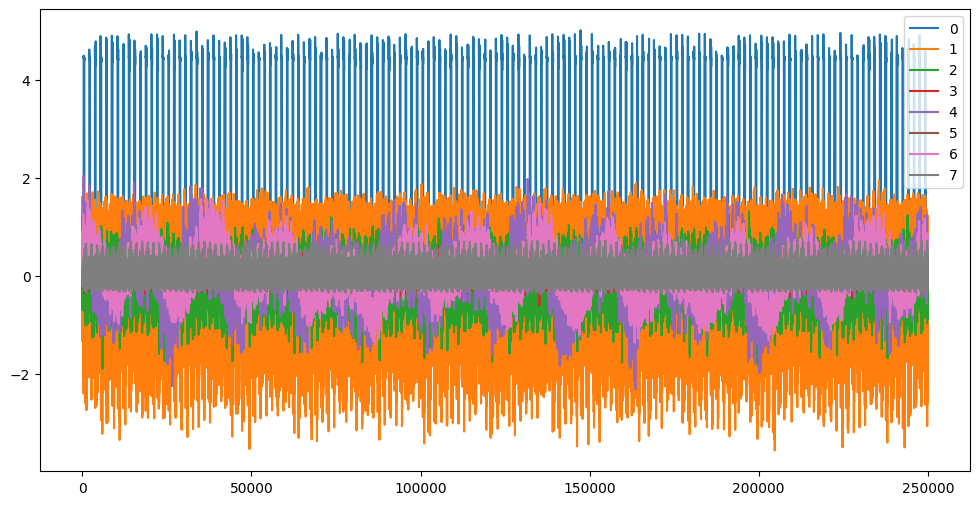

In [26]:
normalSample = pd.read_csv('./data/normal/30.72.csv', header=None)

normalSample.plot(figsize=(12,6))

Text(0, 0.5, 'Voltage')

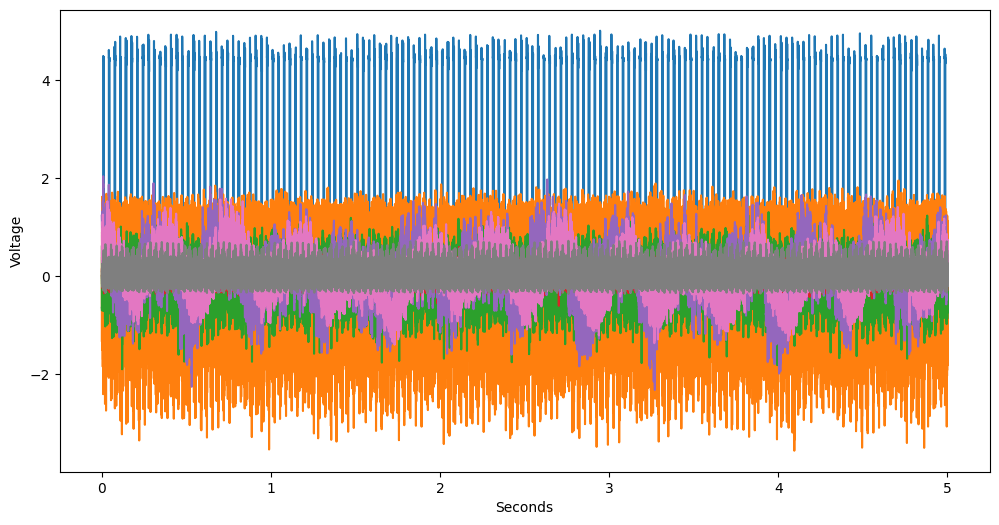

In [31]:
# timeAxes  = np.linspace(0, 5, 250000)
plt.ion()
timeAxes = np.arange(0 ,5, 1/50000)
plt.figure(figsize=(12,6))
plt.plot(timeAxes, normalSample)
plt.xlabel("Seconds")
plt.ylabel("Voltage")

Deste gráfico chegamos a 2 conclusões:
- Dados não estão na mesma escala, o que pode enviesar o algoritmo de machine learn.
- Alta taxa de amostragem (50kHz), o que tornará o processo de treinamento muito lento.

In [109]:
def resample(data):
    data_resampled = []
    sample_rate = 10
    start_index = 0
    stop_index = sample_rate
    for i in range(int(len(data)/sample_rate)):
        data_resampled.append(data[start_index:stop_index].mean(axis=0))
        start_index += sample_rate
        stop_index += sample_rate
   
    return data_resampled


def resample2(data):
    sample_rate_target = 5000 # Hz
    data_resampled = []
    period = 5 # seconds
    step = int(len(data)/sample_rate_target / period)
    groups = int(len(data)/sample_rate_target * period)
    start_index = 0
    stop_index = step
    for i in range(groups):
        data_resampled.append(data[start_index:stop_index].mean())
        start_index += step
        stop_index += step
   
    return data_resampled

In [110]:
r1 = resample(normalSample)
r2 = resample2(normalSample)